In [7]:
#Cargamos las librerias necesarias

import pandas as pd #Manejo y analisis de estruturas de datos
import numpy as np #Calculo numero y el analisis de datos
import seaborn as sns #Creacion de graficos estadisticos
import matplotlib.pyplot as plt #creacion de graficos en dos dimensiones

#Librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
#Lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [11]:
#Realizamos la lectura de los datos para el analisis exploratorio
Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [13]:
#Descripcion de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

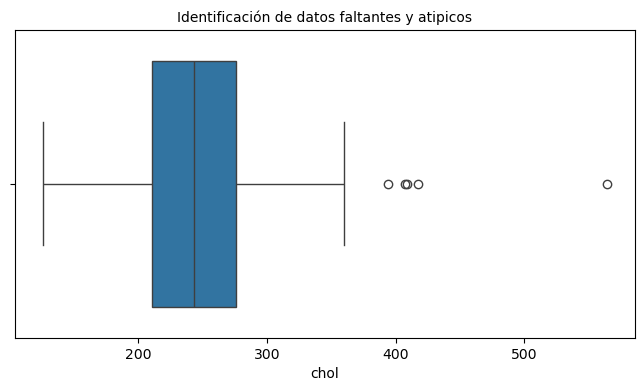

In [31]:
#Identificacion de datos faltantes y valores atipicos
plt.figure(figsize = (8,4))
sns.boxplot(x = Datos['chol'])
plt.title('Identificación de datos faltantes y atipicos', fontsize = 10)


In [43]:
#Como en este caso no se lograron observar datos faltantes o nulos nos saltamos este paso

#Procedemos con la identificación de datos atipicos

Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

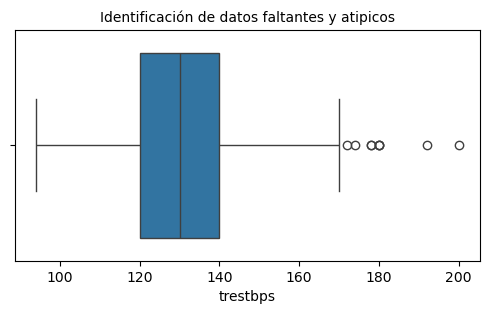

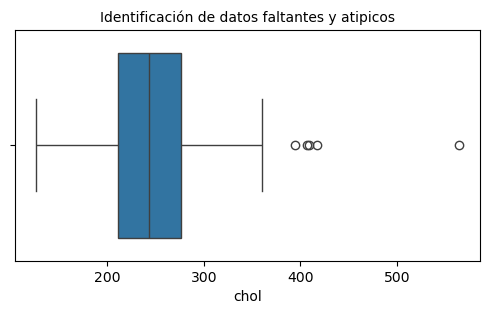

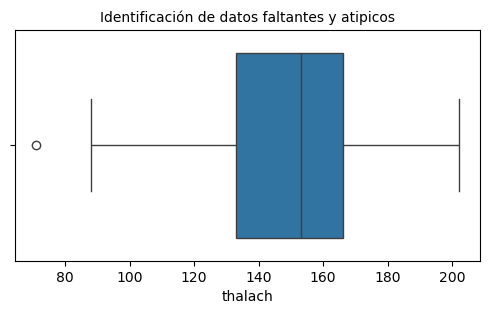

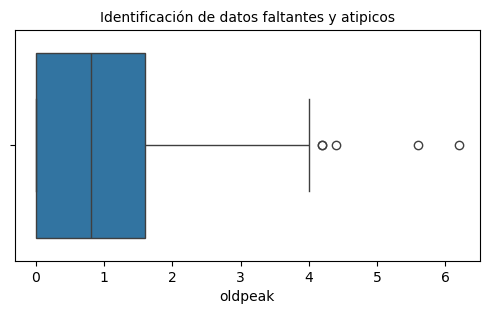

In [49]:
#Identificacion de datos atipicos

plt.figure(figsize = (6,3))
sns.boxplot(x = Datos['trestbps'])
plt.title('Identificación de datos faltantes y atipicos', fontsize = 10)


plt.figure(figsize = (6,3))
sns.boxplot(x = Datos['chol'])
plt.title('Identificación de datos faltantes y atipicos', fontsize = 10)


plt.figure(figsize = (6,3))
sns.boxplot(x = Datos['thalach'])
plt.title('Identificación de datos faltantes y atipicos', fontsize = 10)


plt.figure(figsize = (6,3))
sns.boxplot(x = Datos['oldpeak'])
plt.title('Identificación de datos faltantes y atipicos', fontsize = 10)

In [53]:
#Conteo de datos atipicos
trestbp_min = 90
trestbp_max = 180
Total_Atipicos = ((Datos['trestbps']<trestbp_min)|(Datos['trestbps']>trestbp_max)).sum()
print("El total de datos atipicos en trestbps es {}".format(Total_Atipicos))

chol_min = 40
chol_max = 400
Total_Atipicos = ((Datos['chol']<chol_min)|(Datos['chol']>chol_max)).sum()
print("El total de datos atipicos en chol es {}".format(Total_Atipicos))

thalach_min = 20
thalach_max = 200
Total_Atipicos = ((Datos['thalach']<thalach_min)|(Datos['thalach']>thalach_max)).sum()
print("El total de datos atipicos en thalach es {}".format(Total_Atipicos))


oldpeak_min = 0
oldpeak_max = 5
Total_Atipicos = ((Datos['oldpeak']<oldpeak_min)|(Datos['oldpeak']>oldpeak_max)).sum()
print("El total de datos atipicos en trestbps es {}".format(Total_Atipicos))

El total de datos atipicos en trestbps es 2
El total de datos atipicos en chol es 4
El total de datos atipicos en thalach es 1
El total de datos atipicos en trestbps es 2


In [55]:
#Filtramos datos atipicos
Datos = Datos[(Datos['trestbps']<trestbp_max)&(Datos['trestbps']>trestbp_min)]

Datos = Datos[(Datos['chol']<chol_max)&(Datos['chol']>chol_min)]

Datos = Datos[(Datos['thalach']<thalach_max)&(Datos['thalach']>thalach_min)]

Datos = Datos[(Datos['oldpeak']<oldpeak_max)&(Datos['oldpeak']>oldpeak_min)]

In [57]:
#Validamos si se removieron los datos atipicos
Total_Atipicos = ((Datos['trestbps']<trestbp_min)|(Datos['trestbps']>trestbp_max)).sum()
print("El total de datos atipicos en trestbps es {}".format(Total_Atipicos))

Total_Atipicos = ((Datos['chol']<chol_min)|(Datos['chol']>chol_max)).sum()
print("El total de datos atipicos en chol es {}".format(Total_Atipicos))

Total_Atipicos = ((Datos['thalach']<thalach_min)|(Datos['thalach']>thalach_max)).sum()
print("El total de datos atipicos en thalach es {}".format(Total_Atipicos))

Total_Atipicos = ((Datos['oldpeak']<oldpeak_min)|(Datos['oldpeak']>oldpeak_max)).sum()
print("El total de datos atipicos en trestbps es {}".format(Total_Atipicos))

El total de datos atipicos en trestbps es 0
El total de datos atipicos en chol es 0
El total de datos atipicos en thalach es 0
El total de datos atipicos en trestbps es 0


In [66]:
#Revisamos el tipo de dato y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        192 non-null    int64  
 1   sex        192 non-null    int64  
 2   cp         192 non-null    int64  
 3   trestbps   192 non-null    int64  
 4   chol       192 non-null    int64  
 5   fbs        192 non-null    int64  
 6   restecg    192 non-null    int64  
 7   thalach    192 non-null    int64  
 8   exang      192 non-null    int64  
 9   oldpeak    192 non-null    float64
 10  slope      192 non-null    int64  
 11  ca         192 non-null    int64  
 12  thal       192 non-null    int64  
 13  condition  192 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 22.5 KB


# Paso 3. Seleccionar las características mas relevantes para entrenar el modelo usando selección de características

In [70]:
# Total de personas con enfermedad cardiaca
Datos['condition'].value_counts()

condition
1    104
0     88
Name: count, dtype: int64

# Paso 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [78]:
#Porcentaje de datos para entrenamiento (Train) = 75% y para prueba (Test) = 25%

#Creamos variables X y Y para almacenar la informacion del entrenamiento

X = Datos.drop('condition', axis = 1) #Se cargan los datos de Train sin la columna condition
Y = Datos['condition'] #Se cargan los datos de Train con los datos de la columna condition

#La funcion train_test_split crea una division de un conjunto de datos en dos bloques, uno de entrenamiento y otro de prueba (Train y Test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 0)

In [80]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
80    67    1   2       152   212    0        2      150      0      0.8   
294   35    1   3       120   198    0        0      130      1      1.6   
143   43    1   2       130   315    0        0      162      0      1.9   
37    56    0   1       140   294    0        2      153      0      1.3   
28    62    1   1       120   281    0        2      103      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
122   51    0   2       130   256    0        2      149      0      0.5   
108   54    1   2       120   258    0        2      147      0      0.4   
161   67    1   3       120   229    0        2      129      1      2.6   
251   53    0   3       130   264    0        2      143      0      0.4   
244   54    1   3       124   266    0        2      109      1      2.2   

     slope  ca  thal  
80       1   0     2  
294      1   0     2  
143      0   1    

In [82]:
print (Y_train)

80     1
294    1
143    0
37     0
28     1
      ..
122    0
108    0
161    1
251    0
244    1
Name: condition, Length: 144, dtype: int64


# Paso 5. Entrenar el modelo configurando los distintos hiperparámetros

In [86]:
#Contruir el modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") #liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit (X_train, Y_train)

#Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) #La funcion predict predice los valores a partir del conjunto de datos de validacion

In [88]:
print (Y_test)

156    0
270    1
97     0
237    1
275    0
12     1
114    0
139    0
288    1
189    1
118    0
120    0
204    1
287    0
184    1
46     0
183    1
284    0
3      1
176    0
206    1
47     0
171    1
74     1
194    1
117    0
99     0
10     1
126    1
220    1
177    0
19     0
105    0
224    1
14     0
267    1
56     0
285    0
106    1
168    1
129    1
291    1
169    0
192    1
229    1
213    1
165    0
170    1
Name: condition, dtype: int64


In [90]:
print (Prediccion)

[0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0
 0 1 0 1 1 1 1 1 1 0 1]


# Paso 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como presición, recall, F1-score, etc

In [94]:
#Desempeño del modelo de regresion
print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.81      0.81      0.81        26

    accuracy                           0.79        48
   macro avg       0.79      0.79      0.79        48
weighted avg       0.79      0.79      0.79        48



# Paso 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

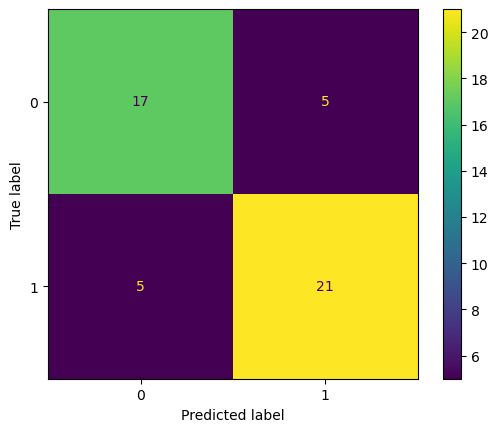

In [98]:
#Matrix de confusión del modelo
cm = confusion_matrix(Y_test, Prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

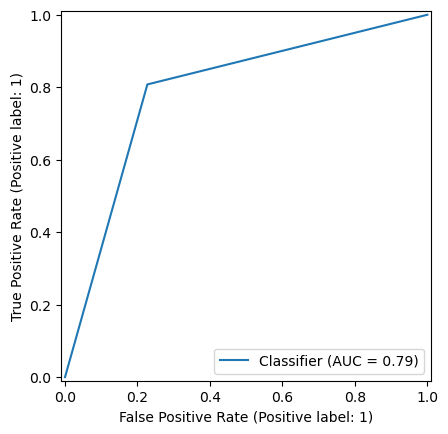

In [100]:
#Curva de precision del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

# **Paso 8. Interpretar, analizar y documentar los resultados obtenidos**

- **Precisión:** Mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. En esta ocasión para la clase "condition" es 0.81, lo que significa que  el 81% de los predichos como personas con enfermedad cardiaca por el modelo si estaban enfermos.
- **Recall:** Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. En este caso el Recall para la clase "condition" es 0.81, lo que indica que el modelo indentificó correctamente al 81% de enfermos.
- **F1 Score:** Es la medida amónica de precisión y recuperación, proporciona una puntuación unica que equilibra la Precisión y Recall. En este caso la puntuación F1 para la clase "condition" es 0.61, lo que indica un equiplibrio entre precisión y recall.

**De la Matriz de Confusión podemos interpretar.**
- **Verdaderos negativos:** El recuento de observaciones que un clasificador predijo correctamente como falso 17.
- **Verdaderos positivos:** El recuento que un clasificador predijo como verdaderos 21.
- **Falsos positivos:** E recuento de observaciones que un clasificador predijo incorrectamente como verdaderas 5.
- **Falsos negativos:** El recuento de observaciones que un clasificador predijo incorrectamente como falso 5.

**De la curva de precisión del modelo se puede interpretar.**
- El AUC es 0,79 lo que significa que el 79% de las predicciones del clasificador son correctar en todos los umbrales de clasificación.